In [1]:
import bisect
from datetime import datetime, timedelta
import warnings 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('n_users.csv')
df['date'] = pd.to_datetime(df['date'])

n_users, dates = df['n_users'].values, df['date'].values
begin_date, end_date = df.iloc[0].date, df.iloc[-1].date

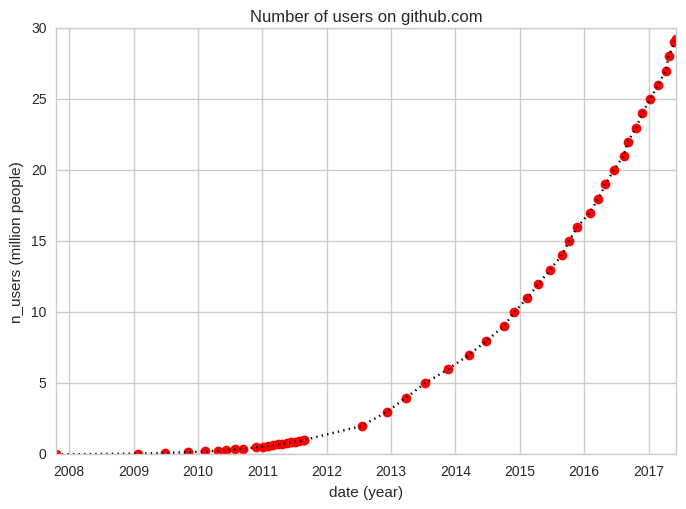

In [3]:
plt.title('Number of users on github.com')
plt.plot(dates, n_users/10**6,'ro')
plt.plot(dates, n_users/10**6, 'black', linestyle=':')
plt.xlabel('date (year)')
plt.ylabel('n_users (million people)')
plt.show()

In [4]:
def get_coef(p1, p2):
    x = np.array([p1[0], p2[0]]).astype('datetime64[D]').astype(int)
    y = np.array([p1[1], p2[1]])
    m = (y[1] - y[0]) / (x[1] - x[0])
    p = y[0] - m * x[0]
    return m, p

def get_all_coefs(x, y):
    coefs = list()
    n = x.size
    for i in range(1, n):
        coefs.append(get_coef((x[i - 1], y[i - 1]), (x[i], y[i])))
    return coefs

def line(a, b, x):
    return int(a * x + b)
    
def get_index(date, dates):
    date = np.datetime64(datetime.strptime(date, "%Y-%m-%d"))
    global begin_date, end_date
    assert begin_date < date <= end_date, \
        'date: {} index out of range'.format(date)
    return bisect.bisect_left(dates, date)

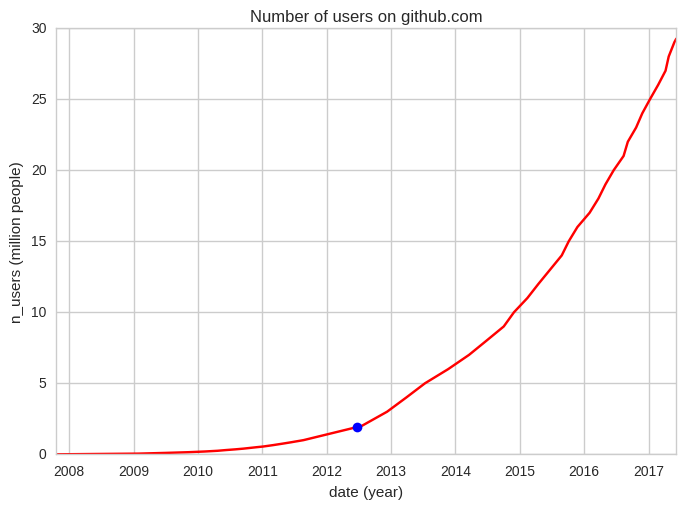

In [5]:
def get_n_users(date):
    global coefs, dates
    index = get_index(date, dates)
    coef = coefs[index - 1]
    n_days = np.datetime64(date).astype('datetime64[D]').astype(int)
    return line(*coef, n_days)

def plot_n_users(dates, n_users):
    plt.title('Number of users on github.com')
    plt.plot(dates, n_users/10**6, 'r')
    plt.xlabel('date (year)')
    plt.ylabel('n_users (million people)')
    
def plot_n_new_users(dates, n_users, ext_title=''):
    plt.title('Number of new users on github.com' + ext_title)
    plt.bar(dates[1:], (n_users[1:] - n_users[:-1])/10**6)
    plt.xlabel('date (year)')
    plt.ylabel('n_users (million people)')
    
def plot_one_point(date):
    global coefs, dates
    n_users = get_n_users(date)
    date = np.datetime64(date)
    plt.plot(date, n_users/10**6, 'bo')

coefs = get_all_coefs(dates, n_users)    
plot_n_users(dates, n_users)
plot_one_point('2012-06-21')
plt.show()

In [6]:
get_n_users('2012-06-21')

1918181

In [7]:
def next_year(date):
    return datetime(date.year + 1, 1, 1) 

def next_month(date):
    next_year = date.year + 1 if date.month == 12 else date.year
    next_month = date.month + 1 if date.month != 12 else 1
    return datetime(next_year, next_month, 1)

def next_day(date):
    return date + timedelta(days=1)

def compute_n_users(begin_date, end_date, func_next):
    n_users = list()
    dates = list()
    date = func_next(begin_date)
    while date <= end_date:
        n_user = get_n_users(date.strftime("%Y-%m-%d"))
        n_users.append(n_user)
        dates.append(date)
        date = func_next(date)
    return np.array(dates), np.array(n_users)

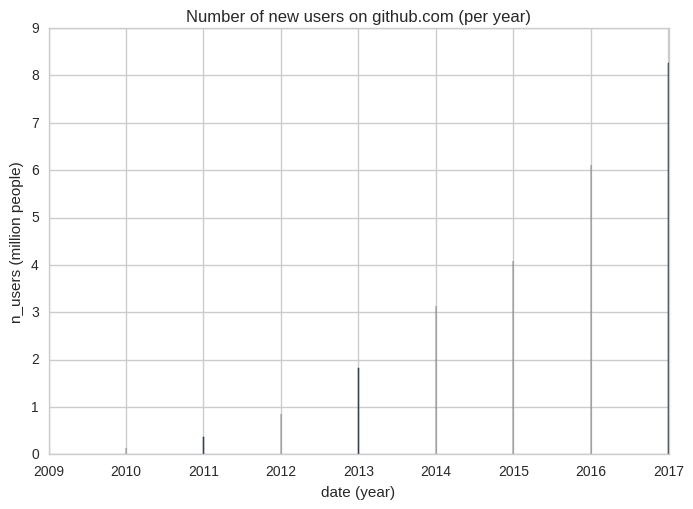

In [8]:
years_dates, years_n_users = compute_n_users(begin_date, end_date, next_year)
plot_n_new_users(years_dates, years_n_users, ' (per year)')
plt.show()

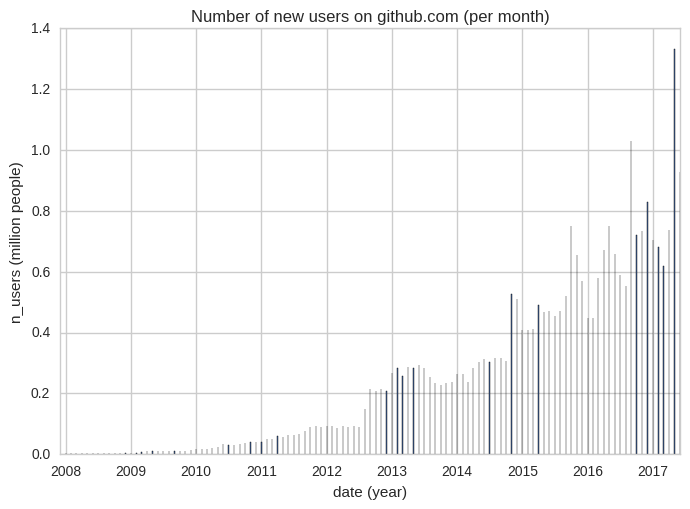

In [9]:
months_dates, months_n_users = compute_n_users(begin_date, end_date, next_month)
plot_n_new_users(months_dates, months_n_users, ' (per month)')
plt.show()

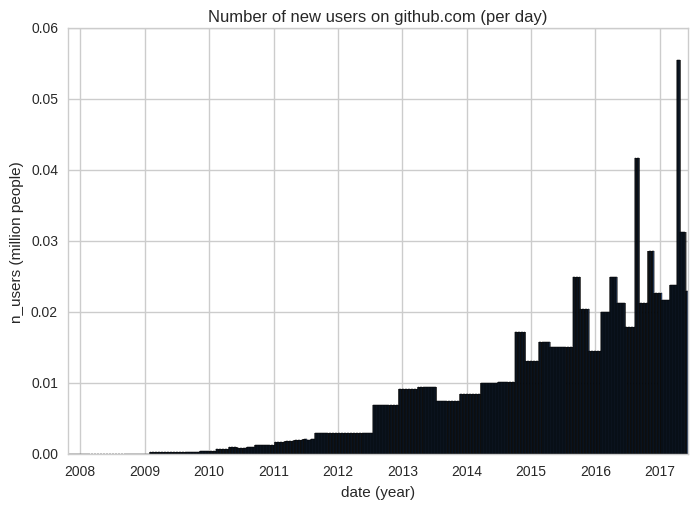

In [10]:
days_dates, days_n_users = compute_n_users(begin_date, end_date, next_day)
plot_n_new_users(days_dates, days_n_users, ' (per day)')
plt.show()